In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from autogluon.tabular import TabularPredictor

In [3]:
df=pd.read_csv('dataset_heart.csv')
df.head()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    int64  
 2   chest pain type                       270 non-null    int64  
 3   resting blood pressure                270 non-null    int64  
 4   serum cholestoral                     270 non-null    int64  
 5   fasting blood sugar                   270 non-null    int64  
 6   resting electrocardiographic results  270 non-null    int64  
 7   max heart rate                        270 non-null    int64  
 8   exercise induced angina               270 non-null    int64  
 9   oldpeak                               270 non-null    float64
 10  ST segment                            270 non-null    int64  
 11  major vessels      

In [5]:
df['heart disease']-=1

In [6]:
df.describe()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'sex '}>,
        <Axes: title={'center': 'chest pain type'}>,
        <Axes: title={'center': 'resting blood pressure'}>],
       [<Axes: title={'center': 'serum cholestoral'}>,
        <Axes: title={'center': 'fasting blood sugar'}>,
        <Axes: title={'center': 'resting electrocardiographic results'}>,
        <Axes: title={'center': 'max heart rate'}>],
       [<Axes: title={'center': 'exercise induced angina'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'ST segment'}>,
        <Axes: title={'center': 'major vessels'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'heart disease'}>, <Axes: >, <Axes: >]],
      dtype=object)

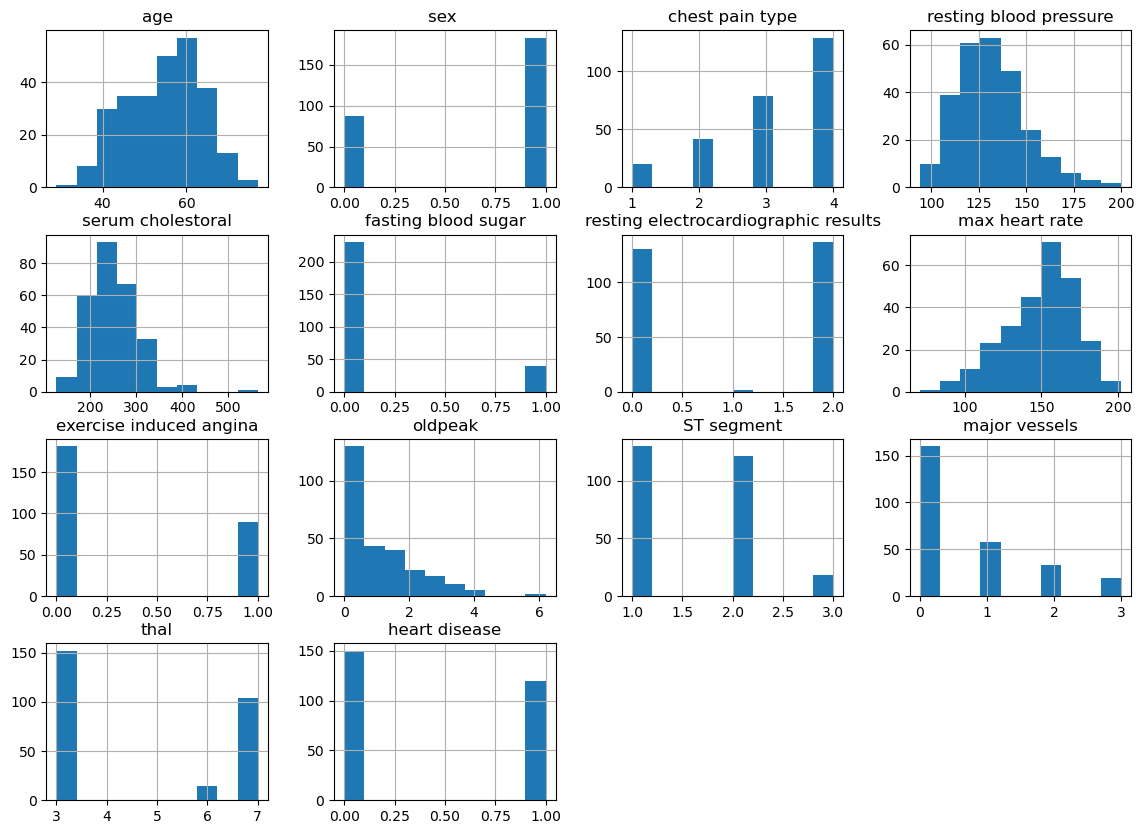

In [7]:
df.hist(figsize=(14,10))

<Axes: >

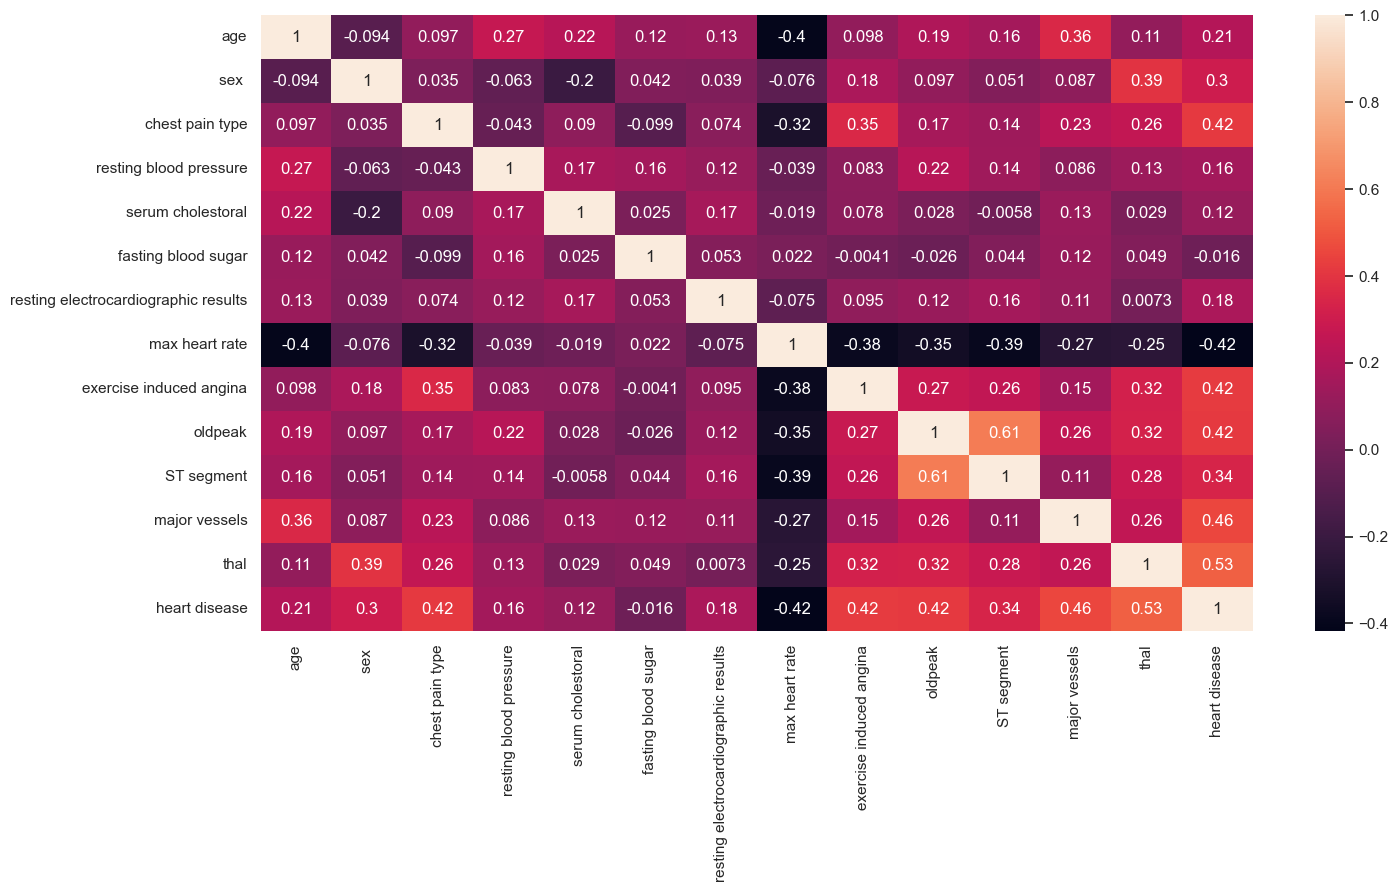

In [8]:
sns.set(rc={'figure.figsize':(16,8)})
corr=df.corr()
sns.heatmap(corr, annot=True)

In [9]:
train,test=train_test_split(df, test_size=0.2) 

# Exploring models
we'll use autogloun since it tries different models and give a good summury about them

In [ ]:
predictor = TabularPredictor(label='heart disease').fit(train_data=train, presets='best_quality', time_limit=600) 

In [44]:
predictor.leaderboard(silent=True)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.875000,0.799889,58.970614,0.000527,0.409809,2,True,14
1,CatBoost_BAG_L1,0.865741,0.050223,10.728598,0.050223,10.728598,1,True,7
2,LightGBM_BAG_L1,0.847222,0.095486,5.809437,0.095486,5.809437,1,True,4
3,NeuralNetFastAI_BAG_L1,0.847222,0.543657,35.655554,0.543657,35.655554,1,True,10
4,NeuralNetTorch_BAG_L1,0.837963,0.482305,22.773679,0.482305,22.773679,1,True,12
5,RandomForestEntr_BAG_L1,0.833333,0.041878,0.267393,0.041878,0.267393,1,True,6
6,LightGBMLarge_BAG_L1,0.833333,0.082957,5.876274,0.082957,5.876274,1,True,13
7,LightGBMXT_BAG_L1,0.828704,0.109995,6.367216,0.109995,6.367216,1,True,3
8,XGBoost_BAG_L1,0.828704,0.249211,5.355651,0.249211,5.355651,1,True,11
9,RandomForestGini_BAG_L1,0.819444,0.043804,0.278723,0.043804,0.278723,1,True,5


acc : 0.8703703703703703
F1 :  0.8627450980392156


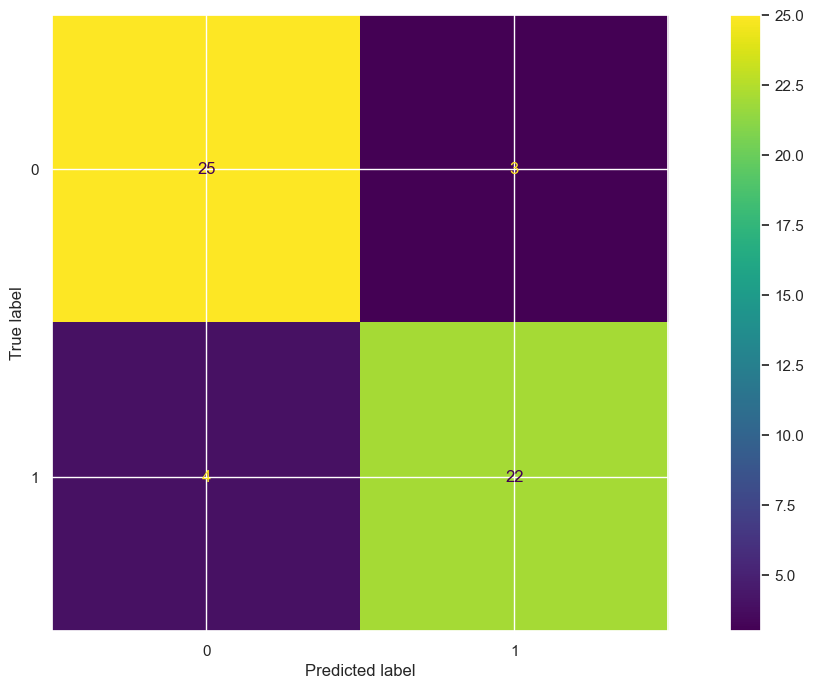

In [21]:
pre=predictor.predict(test.drop('heart disease', axis=1), )
acc=accuracy_score(test['heart disease'],pre)
f1=f1_score(test['heart disease'],pre)
print("acc :", acc)
print( "F1 : ", f1)
cm=confusion_matrix(test['heart disease'],pre)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=[0,1])
disp.plot()

In [22]:
predictor.feature_importance(test)

Computing feature importance via permutation shuffling for 13 features using 54 rows with 5 shuffle sets...
	54.33s	= Expected runtime (10.87s per shuffle set)
	15.67s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
major vessels,0.118519,0.036099,0.000916,5,0.192847,0.044190
thal,0.088889,0.044212,0.005429,5,0.179923,-0.002145
exercise induced angina,0.040741,0.024145,0.009777,5,0.090456,-0.008975
chest pain type,0.029630,0.028085,0.038871,5,0.087456,-0.028197
oldpeak,0.025926,0.016563,0.012448,5,0.060030,-0.008178
resting electrocardiographic results,0.007407,0.010143,0.088904,5,0.028292,-0.013477
sex,0.000000,0.000000,0.500000,5,0.000000,0.000000
serum cholestoral,0.000000,0.013095,0.500000,5,0.026962,-0.026962
max heart rate,0.000000,0.013095,0.500000,5,0.026962,-0.026962
age,-0.003704,0.008282,0.813050,5,0.013348,-0.020756


# Chosing models
after seeing the results we'll remove some colmuns that have high p_value, and we'll use Random foreset since it give good results and easy to implement

In [23]:
X_train,X_test,y_train,y_test=train_test_split(df.drop(['heart disease','fasting blood sugar', 'resting electrocardiographic results' ],axis=1),df['heart disease'], test_size=0.2) 
X_train

,age,sex,chest pain type,resting blood pressure,serum cholestoral,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal
129,60,1,4,117,230,160,1,1.4,1,2,7
239,52,1,2,120,325,172,0,0.2,1,0,3
1,67,0,3,115,564,160,0,1.6,2,0,7
213,58,1,4,128,216,131,1,2.2,2,3,7
134,54,1,3,150,232,165,0,1.6,1,0,7
...,...,...,...,...,...,...,...,...,...,...,...
222,57,1,3,150,168,174,0,1.6,1,0,3
114,42,1,2,120,295,162,0,0.0,1,0,3
151,50,0,3,120,219,158,0,1.6,2,0,3
176,51,1,4,140,298,122,1,4.2,2,3,7


# DT Classfier

In [45]:
class DNode:
    def __init__(self, threshold ,true_node, false_node, feature_index ):
        self.threshold=threshold
        self.true_node=true_node
        self.false_node=false_node
        self.feature_index=feature_index

class Leaf:
    def __init__(self, value) -> None:
        self.value=value

class DesicionTreeC:
    def __init__(self, max_depth=3, min_samples_split=5 ):
        self.max_depth=max_depth
        self.min_samples_split=min_samples_split
        self.root=None

    def _gini(self,y):
        labels,counts=np.unique(y, return_counts=True)
        return 1- sum(np.square(counts))/len(y)**2

    
    def _info_gain(self,parent, true, false):
        Pt=len(true)/len(parent)
        Pf=len(false)/len(parent)
        return self._gini(parent)- Pt*self._gini(true)-Pf*self._gini(false)


    
    def _get_best_split(self,dataset):
        
        best_split={}
        max_gain=-float('inf')

        _ ,n_features=dataset.shape
        for feature in range(n_features-1): # skip target(last one)
            thresholds=np.unique(dataset[:, feature])
            for threshold in thresholds:
                cond= threshold<dataset[:, feature]
                true_set, false_set= dataset[cond], dataset[~cond]
                if len(true_set)!=0 and len(false_set)!=0: # if both nonempty
                    gain=self._info_gain(dataset[:,-1],true_set[:, -1], false_set[:, -1])
                    if max_gain<gain:
                        best_split['feature_index']=feature
                        best_split['threshold']=threshold
                        best_split['info_gain']=gain
                        best_split['true_set']=true_set
                        best_split['false_set']=false_set
                        max_gain=gain

        return best_split

    def _build_tree(self,dataset, depth):
        
        if len(dataset)> self.min_samples_split and depth<= self.max_depth:
            best_split=self._get_best_split(dataset)
            if best_split.get('info_gain',0)==0:
                return Leaf(dataset[0,-1]) 
            true_node=self._build_tree(best_split['true_set'], depth+1)
            false_node=self._build_tree(best_split['false_set'], depth+1)
        else:
            values, counts =np.unique(dataset[: ,-1], return_counts=True)
            return Leaf(values[counts.argmax()])
        
        return DNode(best_split['threshold'], true_node, false_node, best_split['feature_index'])
    
    def fit(self,X,y):
        dataset=np.append(X, y.reshape(-1,1) , axis=1)
        self.root=self._build_tree(dataset, 0)

    def _predict_one(self,x, node):

        if isinstance(node,Leaf):
            return node.value
        if node.threshold < x[node.feature_index]:
            return self._predict_one(x,node.true_node)
        
        return self._predict_one(x, node.false_node)
        
    def predict(self, X):
        return [self._predict_one(x, self.root) for x in X]

acc : 0.7407407407407407
F1 :  0.7307692307692307


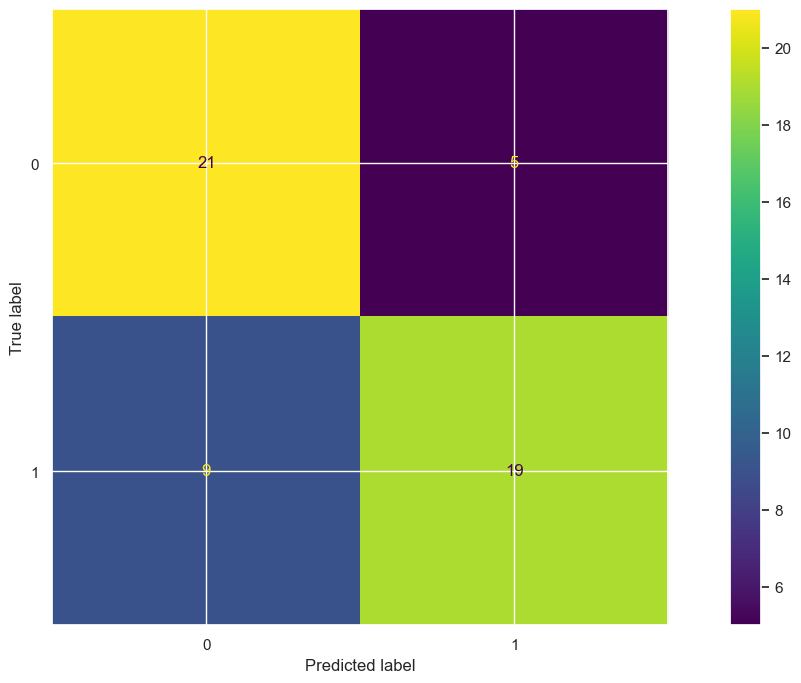

In [29]:
clf=DesicionTreeC(7,5)
clf.fit(X_train.to_numpy(),y_train.to_numpy())
pre=clf.predict(X_test.to_numpy())
acc=accuracy_score(y_test,pre)
f1=f1_score(y_test,pre)
print("acc :", acc)
print( "F1 : ", f1)
cm=confusion_matrix(y_test,pre, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=[0,1])

disp.plot()

acc : 0.6851851851851852
F1 :  0.6792452830188679


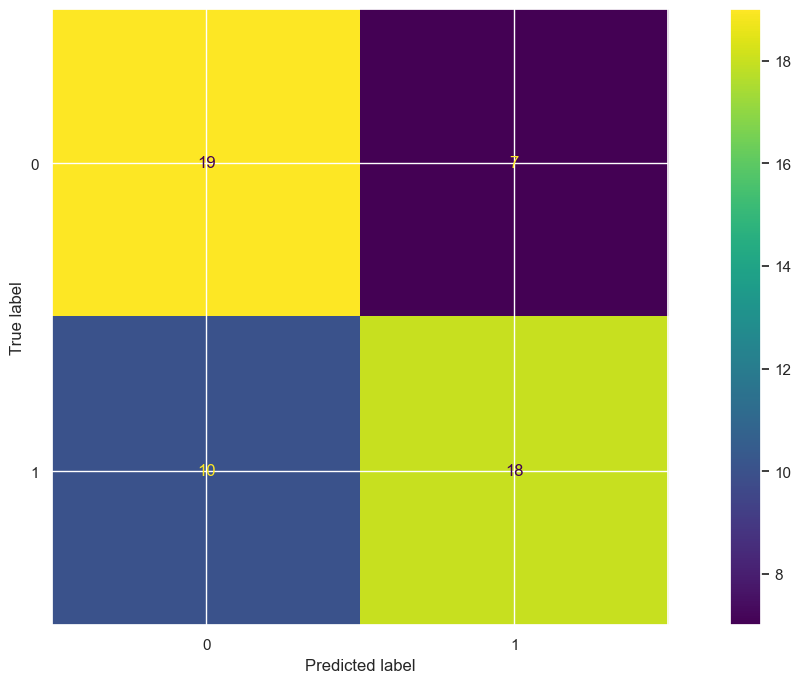

In [30]:
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
pre=clf.predict(X_test)
acc=accuracy_score(y_test,pre)
f1=f1_score(y_test,pre)
print("acc :", acc)
print( "F1 : ", f1)
cm=confusion_matrix(y_test,pre, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=[0,1])
disp.plot()

# RF CLassfier

In [31]:
class RandomForestC:
    def __init__(self, n_estimators=100, max_depth=6, min_samples_split=3, max_features=3,max_samples=None):
        self.trees=[]
        self.n_estimators=n_estimators
        self.max_depth=max_depth
        self.min_samples_split=min_samples_split
        self.max_features=max_features
        self.max_samples=max_samples
    
    def fit(self,X, y):
        n_instance,n_features=X.shape

        if self.max_features> n_features:
            raise Exception('self.max_features> n_features')
        
        if self.max_samples is None:
            self.max_samples=n_instance
          
        if self.max_samples>n_instance:
            raise Exception('self.max_samples>n_instance:')
        
        for model_num in range(self.n_estimators):
            n_model_features=np.random.randint(2,self.max_features+1)
            features=np.random.choice(n_features, size=n_model_features, replace=False)
            indices=np.random.choice(n_instance, size=self.max_samples)
            x=X[indices]
            model= DesicionTreeC(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            model.fit(x[:,features], y[indices])
            self.trees.append({'model':model,
                               'features':features})
            
        
    def predict(self,X):
        predictions=np.array([model['model'].predict(X[:,model['features']]) for model in self.trees])
        best_predictoins=np.zeros(X.shape[0])
        for col in range(X.shape[0]):
            values, counts=np.unique(predictions[:,col], return_counts=True)
            best_predictoins[col]+=values[counts.argmax()]
        return best_predictoins




acc : 0.8148148148148148
F1 :  0.8076923076923077


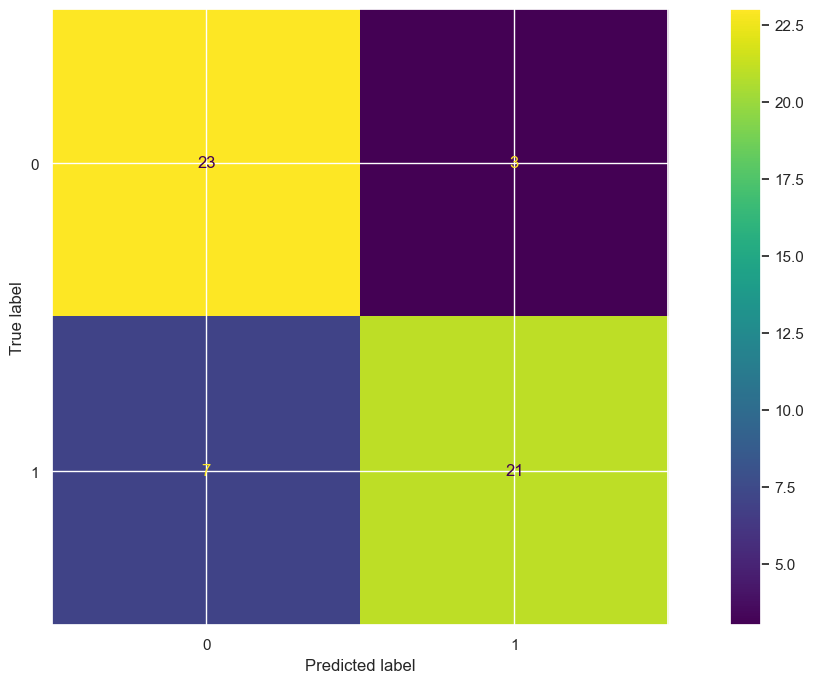

In [39]:
rclf=RandomForestC(n_estimators=100, max_features=3, max_depth=7, min_samples_split=3)
rclf.fit(X_train.to_numpy(),y_train.to_numpy())
pre=rclf.predict(X_test.to_numpy())
acc=accuracy_score(y_test,pre)
f1=f1_score(y_test,pre)
print("acc :", acc)
print( "F1 : ", f1)
cm=confusion_matrix(y_test,pre, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=[0,1])
disp.plot()

acc : 0.8148148148148148
F1 :  0.8076923076923077


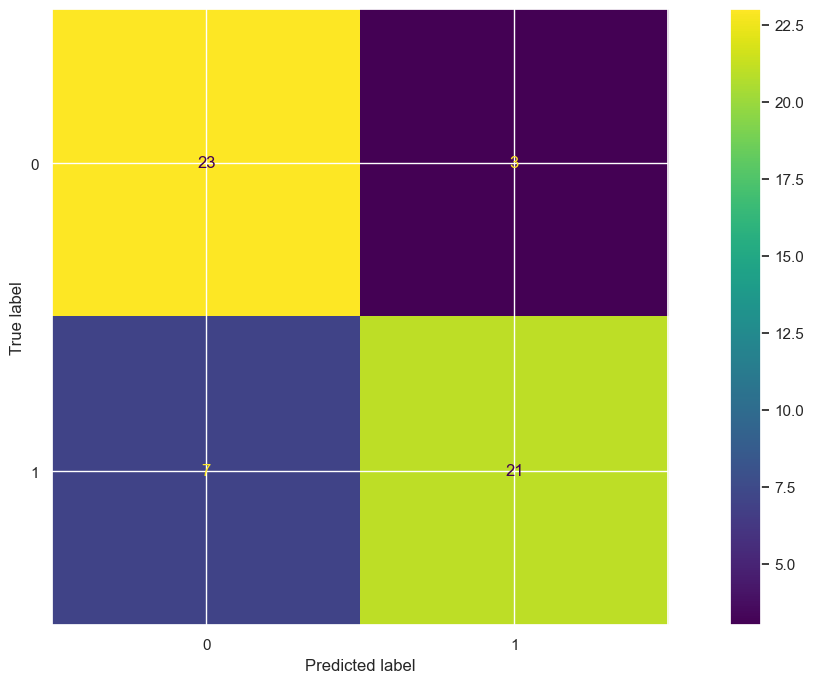

In [40]:
rclf=RandomForestClassifier(n_estimators=100, max_features=3, max_depth=7, min_samples_split=3 ,bootstrap=True)
rclf.fit(X_train,y_train)
pre=rclf.predict(X_test)
acc=accuracy_score(y_test,pre)
f1=f1_score(y_test,pre)
print("acc :", acc)
print( "F1 : ", f1)
cm=confusion_matrix(y_test,pre, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=[0,1])
disp.plot()

# Disscusion
As we see the preformace are almost the same between what we've build and sklearn model, but the main differences between the two are the training speed and sklearn has more hyper parameters.
The training efficiency is bad for some reasons as:

* We implemented the architecture recursively which has heavy overhead
* Sklearn uses the power of multithreading  
* We are lazy to compliance with good parctices and pythonic tricks

# Concludison
Random forest has slightly better performence than DT. Although the accurcy is good, the model is not very good. We can see from the confusion matrix that the model may clissfiy more people as healthy when they are not. And that's a problem since heart disease can cause death. However, there is room to improve the perfomence by some feature engineering or even using another architecture .   